# Ebola Virus
### Modifying the SIR disease model

In [1]:
import numpy as np
class Location:
    def __init__(self,n,pop,sus,inf,rec,imm,ded,xy,k1,b1,v1,d1,testMode = False, vExp = 0):
        self.name = n
        self.population = pop
        self.susceptible = sus
        self.infected = inf
        self.recovered = rec
        self.immune = imm
        self.dead = ded
        self.coordinates = xy
        self.k = k1
        self.b = b1 #float(b1)/float(pop)
        self.v = v1
        self.d = d1
        self.mode = testMode
        self.vexp = vExp
    
    
        
    def timeStep(self,step):
        """Runs 1 days worth of the simulation based on the current parameters"""
        if self.mode:
            
            if (self.infected < 0):
                self.infected = 0
            recChange = self.k*self.infected
            deadChange = self.d*self.infected
            
            popChange = -deadChange
            
            if (self.susceptible < 0):
                self.susceptible = 0
            infChange = (self.b*self.susceptible*self.infected/self.population) -recChange -deadChange
            immChange = (self.v*self.susceptible)*(np.power(step,self.vexp))#np.power
            susChange = -(self.b*self.susceptible*self.infected/self.population) - immChange
            
            self.susceptible = self.susceptible + susChange
            self.infected = self.infected + infChange
            self.immune = self.immune + immChange
            self.recovered = self.recovered + recChange
            self.dead = self.dead + deadChange
            self.population = self.population + popChange
            
            
        else:
            recChange = (self.k*self.infected)
            deadChange = (self.d*self.infected)
            popChange = (-deadChange)
            infChange = (self.b*self.susceptible*self.infected) -recChange -deadChange
            immChange = (self.v*self.susceptible)
            susChange = -(self.b*self.susceptible*self.infected) - immChange
            self.susceptible = self.susceptible + susChange
            self.infected = self.infected + infChange
            self.immune = self.immune + immChange
            self.recovered = self.recovered + recChange
            self.dead = self.dead + deadChange
            self.population = self.population + popChange
        
        
    def popAdj(self,s,i,r,u):
        self.population = self.population + s+i+r+u
        self.susceptible = self.susceptible + s
        self.infected = self.infected + i
        self.recovered = self.recovered + r
        self.immune = self.immune + u
        
        
    

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from matplotlib import pyplot as plt
%matplotlib inline
import random
#from matplotlib import style
#style.use('fivethirtyeight')
def runSingleModel(steps,x,dataView = False):
    data = DataFrame(np.zeros([steps,6],dtype=np.int64),
                     columns=['Population','Susceptible','Immune','Recovered','Infected','Dead'])
    for i in range(steps):
        data.loc[i].Population = x.population
        data.loc[i].Susceptible = x.susceptible
        data.loc[i].Immune = x.immune
        data.loc[i].Recovered = x.recovered
        data.loc[i].Infected = x.infected
        data.loc[i].Dead= x.dead
        x.timeStep(i)
    
    print(x.population)
    #plt.figure(figsize=(20,10))
    data.plot(figsize=(12,6), title='Ebola Spread %s'%x.name,)
    #plt.autoscale(enable=True)
    plt.xlabel("Days")
    plt.ylabel('Number of People')
    plt.ylim([0,max(data.Population)+int(data.Population[0]/16)])
    
    if dataView:
        print "DATA HEAD: \n\n"
        print data.head(int(steps/6))
        print "\n\n DATA TAIL: \n\n"
        print data.tail(int(steps/6))
    

462.743516105
DATA HEAD: 


   Population  Susceptible  Immune  Recovered  Infected  Dead
0        1000          800     170          0        30     0
1         997          767     186          0        44     2
2         994          728     201          1        63     5
3         990          681     215          2        90     9
4         984          624     229          4       125    15
5         975          556     242          7       169    24
6         963          479     253         10       219    36
7         947          396     262         14       274    52


 DATA TAIL: 


    Population  Susceptible  Immune  Recovered  Infected  Dead
42         475            0     294        149        30   524
43         473            0     294        150        27   526
44         471            0     294        151        25   528
45         469            0     294        151        23   530
46         467            0     294        152        21   532
47         466     

/ext/sage/sage-8.0/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


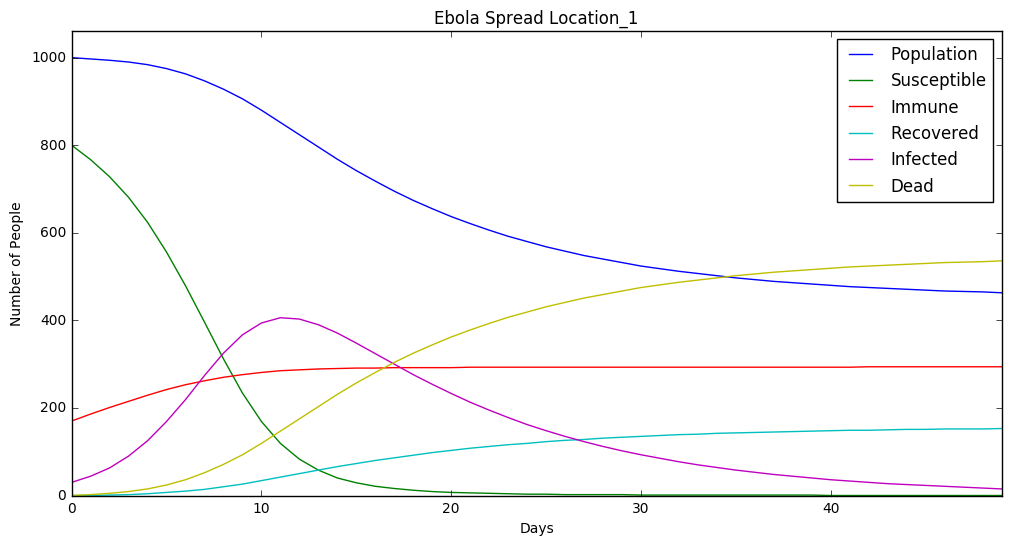

In [3]:
x = Location("Location_1", 1000,800,30,0,170,0,(0,0),0.02,0.0007,0.02,0.07, vExp=2)
runSingleModel(50,x,dataView=True)

65182.2657268
DATA HEAD: 


   Population  Susceptible  Immune  Recovered  Infected  Dead
0      100000        90000    9098          0         2     0
1       99999        89999    9098          0         2     0
2       99999        89960    9133          0         5     0
3       99999        89830    9259          0         9     0
4       99998        89562    9518          0        16     1
5       99997        89113    9953          1        29     2
6       99995        88441   10599          1        52     4
7       99991        87505   11489          3        93     8


 DATA TAIL: 


    Population  Susceptible  Immune  Recovered  Infected   Dead
42       67023            0   47371      14132      4619  32976
43       66700            0   47371      14271      4157  33299
44       66409            0   47371      14395      3741  33590
45       66147            0   47371      14508      3367  33852
46       65911            0   47371      14609      3030  34088
47       6569

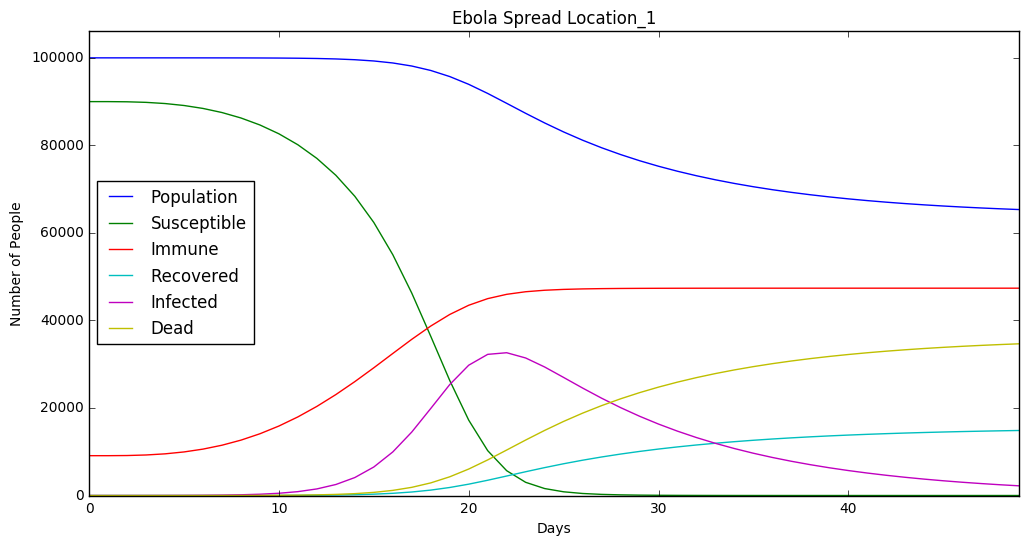

In [4]:
x = Location("Location_1", 100000,90000,2,0,9098,0,(0,0),0.03,1,0.0004,0.07,testMode=True, vExp=1.8)
runSingleModel(50,x,dataView=True)

In [5]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from matplotlib import pyplot as plt
import random
#from matplotlib import style
#style.use('fivethirtyeight')

def runModel_N(steps,locList,dataView = False, peopleFlow=False):
    data = DataFrame(np.zeros([steps,6*len(locList)],dtype=np.int64),
                     columns=[sorted([i for i in range(len(locList))]*6),
                              ['Population','Susceptible','Immune','Recovered','Infected','Dead']*len(locList)])
    tSchedule = data.copy()
    
    #print(data)
    #look below
    for j in range(steps):
        for i in range(len(locList)):
            #make adjPop changes based on tSchedule
            data.loc[j,i].Population = locList[i].population
            data.loc[j,i].Susceptible = locList[i].susceptible
            data.loc[j,i].Immune = locList[i].immune
            data.loc[j,i].Recovered = locList[i].recovered
            data.loc[j,i].Infected = locList[i].infected
            data.loc[j,i].Dead= locList[i].dead
            locList[i].timeStep(j) 
        #if peopleFlow:    
            #for l in range(len(locList)):
             #   for h in range(len(locList)):
                    #all change time steps calced based on distance between
                    #distance = locList[l].coordinates
                    #distance between l and h locs (floored)
                    #s∆
                    #i∆
                    #r∆
                    #d∆
                    #u∆


            #totX1Change = random.random()*int(x1.population/80)+1
            #totX2Change = random.random()*int(x2.population/80)+1
            #netSusChange = random.randrange(1,100) - random.randrange(1,100)#(totX1Change*x2.susceptible)/x2.population - ((totX2Change*x1.susceptible)/x1.population)
            #netImChange = random.randrange(1,100) - random.randrange(1,100) #(totX1Change*x2.immune)/x2.population - ((totX2Change*x1.immune)/x1.population)
            #netRecChange = random.randrange(1,100) - random.randrange(1,100)#(totX1Change*x2.recovered)/x2.population - ((totX2Change*x1.recovered)/x1.population)
            #netInfChange = random.randrange(1,100) - random.randrange(1,100) #(totX1Change*x2.infected)/x2.population - ((totX2Change*x1.infected)/x1.population)
            #x1.popAdj(netSusChange,netImChange,netRecChange,netInfChange)
            #x2.popAdj((-netSusChange),(-netImChange),(-netRecChange),(-netInfChange))    
    for l in range(len(locList)):
        data[l].plot(figsize=(12,6), title='Ebola Spread %s'%locList[l].name)
        #plt.autoscale(enable=True)
        plt.xlabel("Days")
        plt.ylabel('Number of People')
        #plt.ylim([0,max(data.loc[l,0].Population)+int(data.loc[l,0].Population/20)])
        if dataView:
            print locList[l].name
            print data[l].head()
    print(data.tail())

Location_1
   Population  Susceptible  Immune  Recovered  Infected  Dead
0      100000        90000    9098          0         2     0
1       99999        89999    9098          0         2     0
2       99999        89816    9277          0         5     0
3       99999        89452    9637          0         9     0
4       99998        88907   10173          0        16     1
            0                                             
   Population Susceptible Immune Recovered Infected   Dead
45      55045           0  35775     12844     5526  44954
46      54659           0  35775     12954     5028  45340
47      54307           0  35775     13055     4576  45692
48      53986           0  35775     13146     4164  46013
49      53695           0  35775     13229     3789  46304


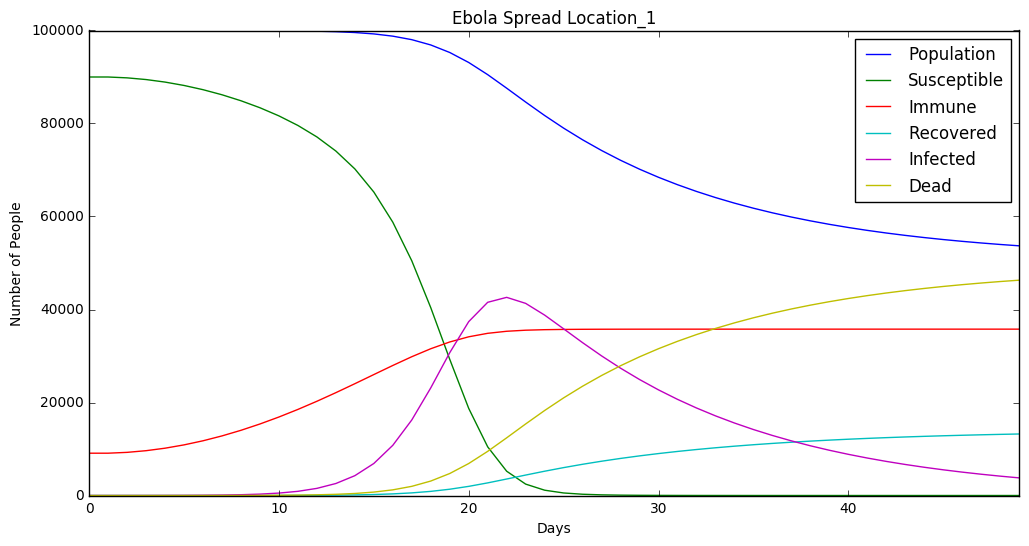

In [6]:
x = Location("Location_1", 100000,90000,2,0,9098,0,(0,0),0.02,1,0.002,0.07,testMode=True, vExp=1)
runModel_N(50,[x],dataView=True)

Location_a
   Population  Susceptible  Immune  Recovered  Infected  Dead
0        1000          800     198          0         1     0
1         999          793     204          0         0     0
2         999          786     210          0         1     0
3         999          779     217          0         2     0
4         999          770     223          0         4     0
Location_b
   Population  Susceptible  Immune  Recovered  Infected  Dead
0        1000          850     149          0         1     0
1         999          850     149          0         0     0
2         999          841     156          0         1     0
3         999          829     167          0         2     0
4         999          814     180          0         4     0
Location_c
   Population  Susceptible  Immune  Recovered  Infected  Dead
0        1200         1000     199          0         1     0
1        1199         1000     199          0         0     0
2        1199          991     207   

Location_d
   Population  Susceptible  Immune  Recovered  Infected  Dead
0       12000        11000     998          0         1     0
1       11999        11000     998          0         0     0
2       11999        10911    1086          0         1     0
3       11999        10749    1246          0         2     0
4       11999        10520    1472          0         5     0
            0                                                     1  \
   Population Susceptible Immune Recovered Infected Dead Population   
60        453           0    280       164        7  546        494   
61        452           0    280       164        6  547        494   
62        452           0    280       165        5  547        493   
63        451           0    280       165        5  548        492   
64        451           0    280       165        4  548        492   

                                 ...       2                          \
   Susceptible Immune Recovered  ...  Immune Re

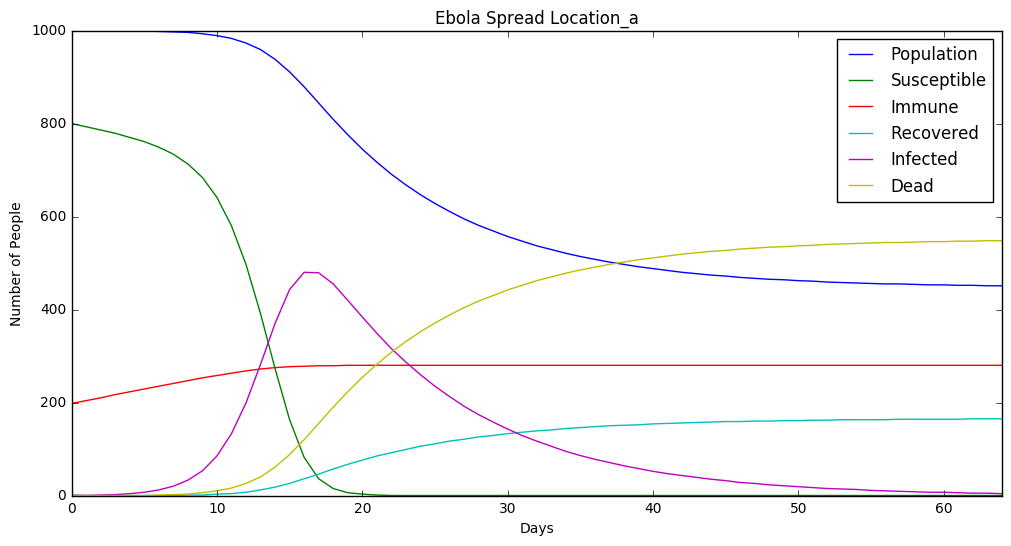

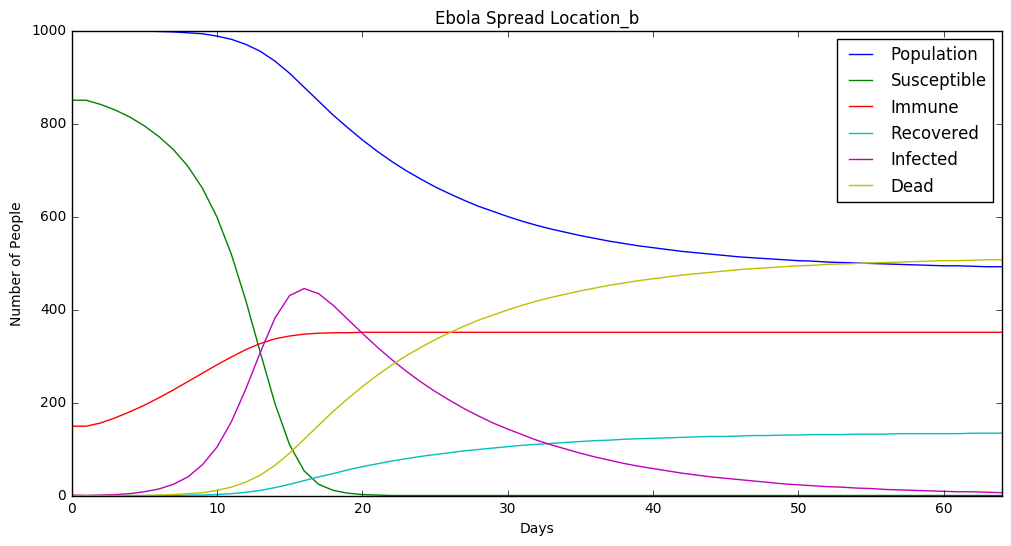

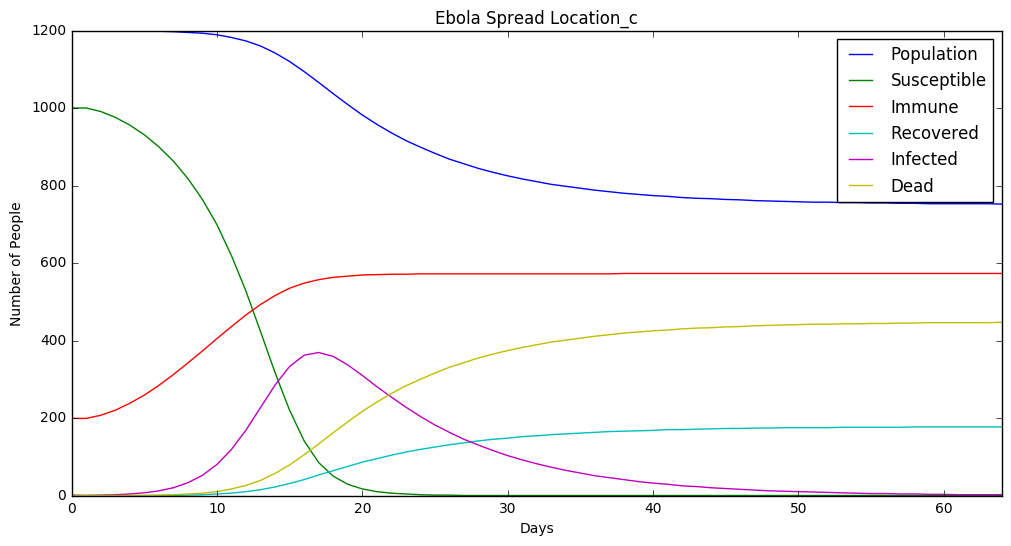

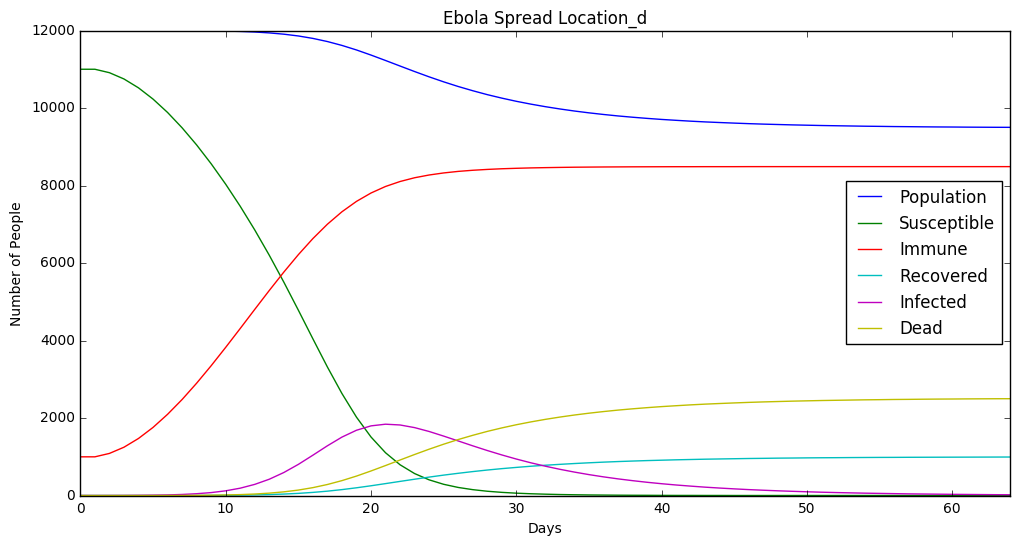

In [7]:
xa = Location("Location_a", 1000,800,1,0,198,0,(0,0),0.022,1,0.008,0.073,testMode=True,vExp=0)
xb = Location("Location_b",1000,850,1,0,149,0,(1,1),0.018,1,0.009,0.068,testMode=True,vExp=0.5)
xc = Location("Location_c",1200,1000,1,0,199,0,(1,2),0.031,1,0.008,0.078,testMode=True,vExp=0.75)
xd = Location("Location_d",12000,11000,1,0,998,0,(3,2),0.031,1,0.008,0.078,testMode=True,vExp=0.88)
runModel_N(65,[xa,xb,xc,xd],dataView=True)

Location_1
   Population  Susceptible  Immune  Recovered  Infected  Dead
0        1000          800     198          0         1     0
1         999          793     204          0         0     0
2         999          786     210          0         1     0
3         999          779     217          0         2     0
4         999          770     223          0         4     0
Location_2
   Population  Susceptible  Immune  Recovered  Infected  Dead
0        1000          850     149          0         1     0
1         999          842     156          0         0     0
2         999          833     164          0         1     0
3         999          825     171          0         2     0
4         999          815     179          0         4     0
Location_3
   Population  Susceptible  Immune  Recovered  Infected  Dead
0        1200         1000     199          0         1     0
1        1199          990     209          0         0     0
2        1199          979     218   

Location_4
   Population  Susceptible  Immune  Recovered  Infected  Dead
0       12000        11000     998          0         1     0
1       11999        10846    1152          0         0     0
2       11999        10693    1303          0         1     0
3       11999        10542    1453          0         2     0
4       11999        10392    1601          0         5     0
            0                                                     1  \
   Population Susceptible Immune Recovered Infected Dead Population   
60        453           0    280       164        7  546        409   
61        452           0    280       164        6  547        408   
62        452           0    280       165        5  547        408   
63        451           0    280       165        5  548        407   
64        451           0    280       165        4  548        407   

                                 ...       2                          \
   Susceptible Immune Recovered  ...  Immune Re

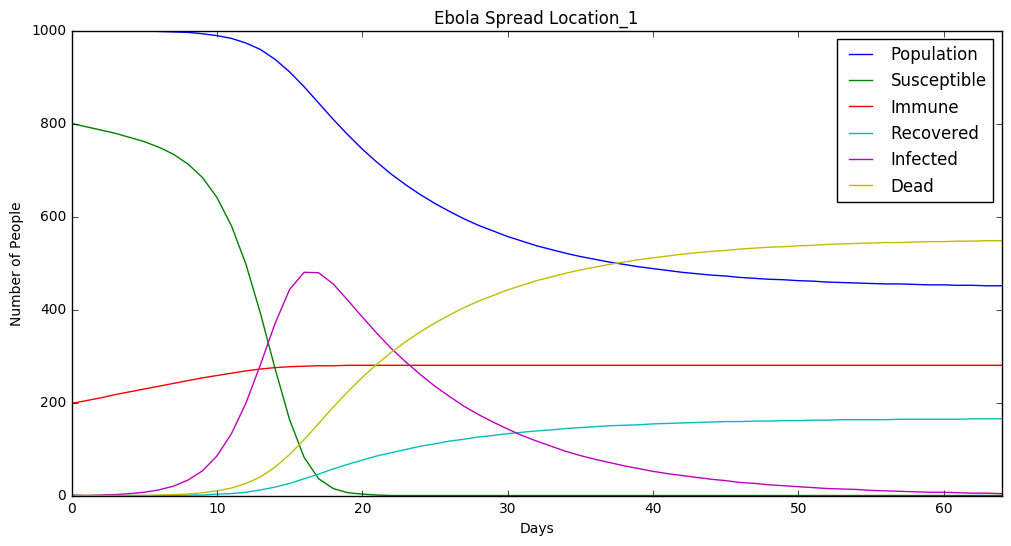

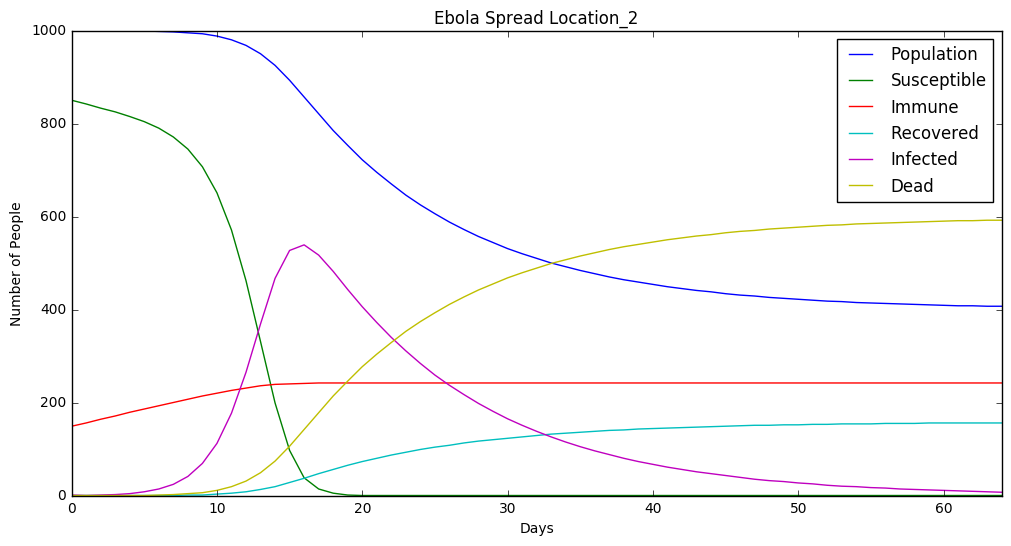

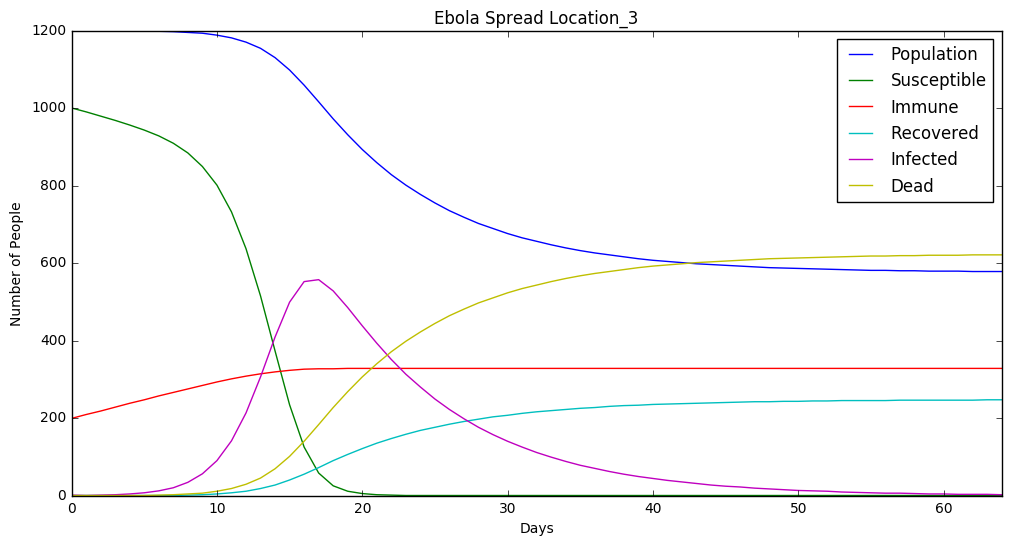

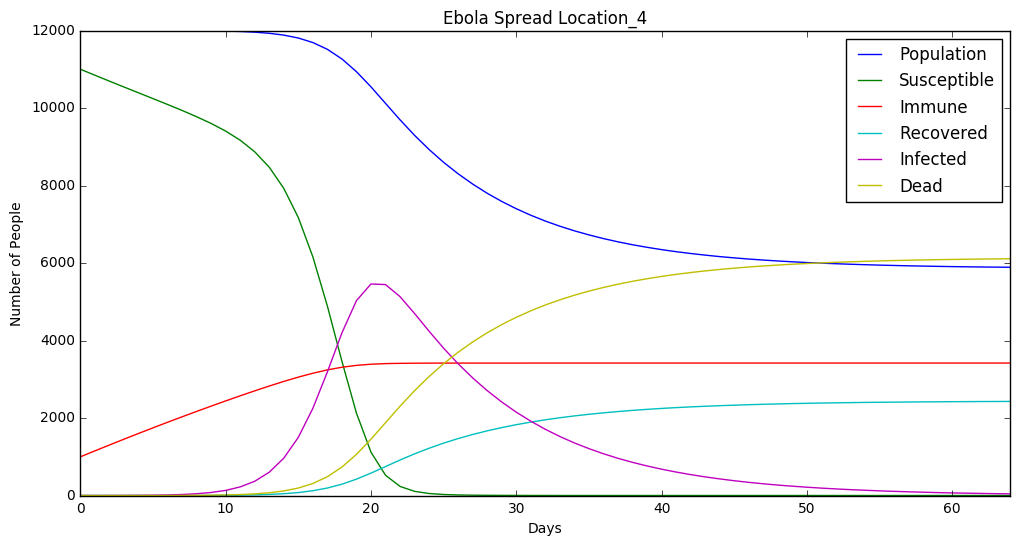

In [8]:
x1 = Location("Location_1", 1000,800,1,0,198,0,(0,0),0.022,1,0.008,0.073,testMode=True)
x2 = Location("Location_2",1000,850,1,0,149,0,(1,1),0.018,1,0.009,0.068,testMode=True)
x3 = Location("Location_3",1200,1000,1,0,199,0,(1,2),0.031,1,0.01,0.078,testMode=True)
x4 = Location("Location_4",12000,11000,1,0,998,0,(3,2),0.031,1,0.014,0.078,testMode=True)
runModel_N(65,[x1,x2,x3,x4],dataView=True)